# tampa modeling residuals w/grouped features

In [139]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="groovy-groove-309018-3049c669c548.json"
client = bigquery.Client()

import seaborn as sns

### Predictors

In [140]:
tampa_zip = ['33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576']

In [141]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [142]:
%%bigquery acs_tampa1
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2011_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2012_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576');


Downloading: 100%|██████████| 250/250 [00:01<00:00, 135.13rows/s]


In [143]:
%%bigquery acs_tampa2
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2013_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2014_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576');

Executing query with job ID: 877bb87c-fb3e-42e8-b01d-abc610320a8c
Query executing: 1.42s

Could not save output to variable 'acs_tampa2'.

ERROR:
 HTTPSConnectionPool(host='bigquery.googleapis.com', port=443): Read timed out.


In [144]:
%%bigquery acs_tampa3
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576');


Executing query with job ID: e8614611-a632-48c4-b605-621b57bbf89f
Query executing: 1.44s

Could not save output to variable 'acs_tampa3'.

ERROR:
 HTTPSConnectionPool(host='bigquery.googleapis.com', port=443): Read timed out.


In [145]:
%%bigquery acs_tampa4
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576')
;

Downloading: 100%|██████████| 125/125 [00:02<00:00, 61.79rows/s]


In [146]:
%%bigquery acs_tampa5

SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576')
;

Downloading: 100%|██████████| 125/125 [00:02<00:00, 61.11rows/s]


In [147]:
%%bigquery acs_tampa6
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2018_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576');

Downloading: 100%|██████████| 125/125 [00:02<00:00, 59.37rows/s]


In [148]:
acs_cols1=acs_tampa1.columns
acs_cols2=acs_tampa2.columns
acs_cols3=acs_tampa3.columns
acs_cols4=acs_tampa4.columns
acs_cols5=acs_tampa5.columns
acs_cols6=acs_tampa6.columns

common_columns=list((((((set(acs_cols1).intersection
                        (set(acs_cols2))).intersection
                        (set(acs_cols3))).intersection
                        (set(acs_cols4))).intersection
                        (set(acs_cols5))).intersection
                        (set(acs_cols6))))

In [149]:
dfs=[acs_tampa1[common_columns],
    acs_tampa2[common_columns],
    acs_tampa3[common_columns],
    acs_tampa4[common_columns],
    acs_tampa5[common_columns],
    acs_tampa6[common_columns]]

acs_all_tampa=pd.concat(dfs)
acs_all_tampa.shape

(664, 234)

In [150]:
acs_all_tampa['do_date'] = acs_all_tampa['do_date'].astype(str)
acs_all_tampa['year'] = np.where(acs_all_tampa['do_date'] =='20072011', '2011',
                                  np.where(acs_all_tampa['do_date'] =='20082012','2012',
                                  np.where(acs_all_tampa['do_date'] =='20092013','2013',
                                  np.where(acs_all_tampa['do_date'] =='20102014','2014',
                                  np.where(acs_all_tampa['do_date'] =='20112015','2015',
                                  np.where(acs_all_tampa['do_date'] =='20122016','2016',
                                  np.where(acs_all_tampa['do_date'] =='20132017','2017',
                                  np.where(acs_all_tampa['do_date'] =='2014-01-01','2018',
                                           None))))))))

In [152]:
acs_all_tampa['year'] = acs_all_tampa['year'].astype('string')


In [153]:
acs_all_tampa.head()

,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,speak_spanish_at_home,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,poverty,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,pop_5_years_over,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,hispanic_pop,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,speak_only_english_at_home,rent_under_10_percent,commuters_16_over,pop_determined_poverty_status,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,income_per_capita,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insurance_real_est

In [154]:
missing_zip = [el for el in tampa_zip if el not in list(acs_all_tampa['geo_id'])]
missing_zip

[]

#### Grouping female age columns together

In [155]:
female_under_18 = acs_all_tampa.female_under_5 + acs_all_tampa.female_5_to_9 + acs_all_tampa.female_10_to_14 + acs_all_tampa.female_15_to_17 + acs_all_tampa.female_18_to_19
female_under_60 = acs_all_tampa.female_20 + acs_all_tampa.female_21 + acs_all_tampa.female_22_to_24 + acs_all_tampa.female_25_to_29 + acs_all_tampa.female_30_to_34 + acs_all_tampa.female_35_to_39 + acs_all_tampa.female_40_to_44 + acs_all_tampa.female_45_to_49 + acs_all_tampa.female_50_to_54 + acs_all_tampa.female_55_to_59 
female_over_60 = acs_all_tampa.female_60_to_61 + acs_all_tampa.female_62_to_64 + acs_all_tampa.female_65_to_66 + acs_all_tampa.female_67_to_69 + acs_all_tampa.female_70_to_74 + acs_all_tampa.female_75_to_79 + acs_all_tampa.female_80_to_84 + acs_all_tampa.female_85_and_over

In [156]:
female_under_18 = female_under_18.astype(float)
female_under_60 = female_under_60.astype(float)
female_over_60 = female_over_60.astype(float)

#### Grouping male age columns together

In [157]:
male_under_18 = acs_all_tampa.male_under_5 + acs_all_tampa.male_5_to_9 + acs_all_tampa.male_10_to_14 + acs_all_tampa.male_15_to_17 + acs_all_tampa.male_18_to_19
male_under_60 = acs_all_tampa.male_20 + acs_all_tampa.male_21 + acs_all_tampa.male_22_to_24 + acs_all_tampa.male_25_to_29 + acs_all_tampa.male_30_to_34 + acs_all_tampa.male_35_to_39 + acs_all_tampa.male_40_to_44 + acs_all_tampa.male_45_to_49 + acs_all_tampa.male_50_to_54 + acs_all_tampa.male_55_to_59 
male_over_60 =  acs_all_tampa.male_65_to_66 + acs_all_tampa.male_67_to_69 + acs_all_tampa.male_70_to_74 + acs_all_tampa.male_75_to_79 + acs_all_tampa.male_80_to_84 + acs_all_tampa.male_85_and_over

In [158]:
male_under_18 = male_under_18.astype(float)
male_under_60 = male_under_60.astype(float)
male_over_60 = male_over_60.astype(float)

#### Grouping rent affordability columns together

In [159]:
under10 = acs_all_tampa.rent_under_10_percent
tento50 = acs_all_tampa.rent_40_to_50_percent + acs_all_tampa.rent_35_to_40_percent + acs_all_tampa.rent_30_to_35_percent+ acs_all_tampa.rent_25_to_30_percent + acs_all_tampa.rent_20_to_25_percent + acs_all_tampa.rent_15_to_20_percent + acs_all_tampa.rent_10_to_15_percent
over50 = acs_all_tampa.rent_over_50_percent
uncomputed = acs_all_tampa.rent_burden_not_computed

In [160]:
rent_under10 = under10.astype(float)
rent_tento50 = tento50.astype(float)
rent_over50 = over50.astype(float)
rent_uncomputed = uncomputed.astype(float)

#### Grouping dwellings columns together

In [161]:
small_dwellings = acs_all_tampa.dwellings_1_units_attached + acs_all_tampa.dwellings_1_units_detached + acs_all_tampa.dwellings_2_units + acs_all_tampa.dwellings_3_to_4_units + acs_all_tampa.dwellings_5_to_9_units
large_dwellings = acs_all_tampa.dwellings_10_to_19_units + acs_all_tampa.dwellings_20_to_49_units + acs_all_tampa.dwellings_50_or_more_units

In [162]:
small_dwellings = small_dwellings.astype(float)
large_dwellings = large_dwellings.astype(float)

#### Grouping commute time together

In [163]:
commute_less_than_30 =  acs_all_tampa.commute_less_10_mins + acs_all_tampa.commute_10_14_mins + acs_all_tampa.commute_15_19_mins + acs_all_tampa.commute_20_24_mins + acs_all_tampa.commute_25_29_mins
commute_less_than_60 = acs_all_tampa.commute_30_34_mins + acs_all_tampa.commute_35_44_mins +  acs_all_tampa.commute_45_59_mins
commute_over_60 =  acs_all_tampa.commute_60_more_mins 

In [164]:
commute_less_than_30 = commute_less_than_30.astype(float)
commute_less_than_60 = commute_less_than_60.astype(float)
commute_over_60 = commute_over_60.astype(float)

#### Grouping income levels together

In [165]:
income_less_than_60000 = acs_all_tampa.income_less_10000 + acs_all_tampa.income_10000_14999 + acs_all_tampa.income_15000_19999 + acs_all_tampa.income_20000_24999 + acs_all_tampa.income_25000_29999 + acs_all_tampa.income_30000_34999 + acs_all_tampa.income_35000_39999 + acs_all_tampa.income_40000_44999 + acs_all_tampa.income_45000_49999 + acs_all_tampa.income_50000_59999
income_less_than_125000 = acs_all_tampa.income_60000_74999 + acs_all_tampa.income_75000_99999 + acs_all_tampa.income_100000_124999
income_over_125000 = acs_all_tampa.income_125000_149999 + acs_all_tampa.income_150000_199999 + acs_all_tampa.income_200000_or_more

In [166]:
income_less_than_60000 = income_less_than_60000.astype(float)
income_less_than_125000 = income_less_than_125000.astype(float)
income_over_125000 = income_over_125000.astype(float)

#### Grouping employment industries together

In [167]:
employed_creative = acs_all_tampa.employed_arts_entertainment_recreation_accommodation_food
employed_prof = acs_all_tampa.employed_education_health_social + acs_all_tampa.employed_finance_insurance_real_estate + acs_all_tampa.employed_information + acs_all_tampa.employed_science_management_admin_waste
employed_skill = acs_all_tampa.employed_manufacturing + acs_all_tampa.employed_construction + acs_all_tampa.employed_agriculture_forestry_fishing_hunting_mining
employed_service = acs_all_tampa.employed_retail_trade + acs_all_tampa.employed_other_services_not_public_admin + acs_all_tampa.employed_public_administration + acs_all_tampa.employed_transportation_warehousing_utilities + acs_all_tampa.employed_wholesale_trade

#### Choosing family type columns

In [168]:
two_parent_hh = acs_all_tampa.two_parent_families_with_young_children.astype(float)
one_parent_hh = acs_all_tampa.one_parent_families_with_young_children.astype(float)

#### Choosing population columns

In [169]:
asian_pop = acs_all_tampa.asian_pop.astype(float)
black_pop = acs_all_tampa.black_pop.astype(float)
hispanic_pop = acs_all_tampa.hispanic_pop.astype(float)
white_pop = acs_all_tampa.white_pop.astype(float)
amerindian_pop = acs_all_tampa.amerindian_pop.astype(float)
other_race_pop = acs_all_tampa.other_race_pop.astype(float)
two_or_more_races_pop = acs_all_tampa.other_race_pop.astype(float)
not_hispanic_pop = acs_all_tampa.not_hispanic_pop.astype(float)
not_us_citizen_pop = acs_all_tampa.not_us_citizen_pop.astype(float)
total_pop = acs_all_tampa.total_pop.astype(float)

In [170]:
pop_columns = [asian_pop, amerindian_pop, black_pop, hispanic_pop, white_pop,other_race_pop,two_or_more_races_pop]

In [171]:
print(asian_pop.sum()+amerindian_pop.sum()+black_pop.sum()+hispanic_pop.sum()+white_pop.sum()+other_race_pop.sum()+two_or_more_races_pop.sum())
print(total_pop.sum())
print(not_hispanic_pop.sum()+hispanic_pop.sum())

15196969.0
15462882.0
15462882.0


#### Grouping education level columns together

In [172]:
college_educated = acs_all_tampa.in_undergrad_college + acs_all_tampa.some_college_and_associates_degree + acs_all_tampa.associates_degree + acs_all_tampa.bachelors_degree + acs_all_tampa.bachelors_degree_2 +acs_all_tampa.bachelors_degree_or_higher_25_64 + acs_all_tampa.masters_degree + acs_all_tampa.graduate_professional_degree + acs_all_tampa.one_year_more_college     
in_school = acs_all_tampa.in_grades_1_to_4 + acs_all_tampa.in_grades_5_to_8 + acs_all_tampa.in_grades_9_to_12
inschoolcheck = acs_all_tampa.in_school
less_than_college_educated = acs_all_tampa.less_one_year_college + + acs_all_tampa.less_one_year_college
high_school_educated = acs_all_tampa.high_school_diploma + acs_all_tampa.high_school_including_ged

In [173]:
college_educated = college_educated.astype(float)
in_school = in_school.astype(float)
inschoolcheck = inschoolcheck.astype(float) 
less_than_college_educated = less_than_college_educated.astype(float)
high_school_educated = high_school_educated.astype(float)

In [174]:
print(in_school.sum())
print(inschoolcheck.sum())

2186520.0
3589797.0


#### Grouping commute type columns together

In [175]:
public_commute = acs_all_tampa.commuters_by_public_transportation + acs_all_tampa.commuters_by_subway_or_elevated + acs_all_tampa.commuters_by_bus
personal_commute = acs_all_tampa.commuters_by_car_truck_van + acs_all_tampa.commuters_by_carpool + acs_all_tampa.commuters_drove_alone

In [176]:
public_commute = public_commute.astype(float)
personal_commute = personal_commute.astype(float)

#### Choosing housing units columns

In [177]:
vacant_housing_units = acs_all_tampa.vacant_housing_units.astype(float)
vacant_housing_units_for_rent = acs_all_tampa.vacant_housing_units_for_rent.astype(float)
vacant_housing_units_for_sale = acs_all_tampa.vacant_housing_units_for_sale.astype(float)

In [178]:
print(vacant_housing_units.sum())
print(vacant_housing_units_for_rent.sum()+vacant_housing_units_for_sale.sum())

1147538.0
330773.0


#### Choosing owner occuppied housing units

In [179]:
owner_occupied_housing_units = acs_all_tampa.owner_occupied_housing_units.astype(float)
owner_occupied_housing_units_lower_value_quartile = acs_all_tampa.owner_occupied_housing_units_lower_value_quartile.astype(float)
owner_occupied_housing_units_median_value = acs_all_tampa.owner_occupied_housing_units_median_value.astype(float)
owner_occupied_housing_units_upper_value_quartile = acs_all_tampa.owner_occupied_housing_units_upper_value_quartile.astype(float)

#### Choosing employment information

In [180]:
unemployed_pop = acs_all_tampa.unemployed_pop.astype(float)
employed_pop = acs_all_tampa.employed_pop.astype(float)

#### Choosing family information

In [181]:
family_households = acs_all_tampa.family_households.astype(float)
nonfamily_households = acs_all_tampa.nonfamily_households.astype(float)

#### Choosing remaining miscelleanous columns

In [182]:
Year = acs_all_tampa.year.astype(int)
geo_id = acs_all_tampa.geo_id.astype(int)
gini_index = acs_all_tampa.gini_index.astype(float)
income_per_capita = acs_all_tampa.income_per_capita.astype(float)
median_age = acs_all_tampa.median_age.astype(float)
median_income = acs_all_tampa.median_income.astype(float)
married_households = acs_all_tampa.married_households.astype(float)

#### Building the final dataframe for ACS features before combining with ZRI information

In [183]:
dict = {'Year': Year, 'geo_id': geo_id, 'gini_index':gini_index, 'income_per_capita':income_per_capita,
       'median_age':median_age, 'median_income':median_income, 'married_households':married_households,
       'family_households':family_households, 'nonfamily_households':nonfamily_households,
       'unemployed_pop':unemployed_pop, 'employed_pop':employed_pop, 'owner_occupied_housing_units':owner_occupied_housing_units,
       'owner_occupied_housing_units_lower_value_quartile':owner_occupied_housing_units_lower_value_quartile,
       'owner_occupied_housing_units_median_value':owner_occupied_housing_units_median_value,
       'owner_occupied_housing_units_upper_value_quartile':owner_occupied_housing_units_upper_value_quartile,
       'vacant_housing_units':vacant_housing_units,'vacant_housing_units_for_rent':vacant_housing_units_for_rent,
       'vacant_housing_units_for_sale':vacant_housing_units_for_sale, 'public_commute':public_commute,
       'personal_commute':personal_commute, 'college_educated':college_educated, 'in_school':in_school,
       'less_than_college_educated':less_than_college_educated, 'high_school_educated':high_school_educated,
       'asian_pop':asian_pop, 'amerindian_pop':amerindian_pop, 'black_pop':black_pop, 'hispanic_pop':hispanic_pop, 
       'income_less_than_60000':income_less_than_60000,
       'income_less_than_125000':income_less_than_125000, 'income_over_125000':income_over_125000,
       'commute_less_than_30':commute_less_than_30, 'commute_less_than_60':commute_less_than_60,
       'commute_over_60':commute_over_60, 'small_dwellings':small_dwellings, 'large_dwellings':large_dwellings,
       'rent_under10':rent_under10, 'rent_tento50':rent_tento50, 'rent_over50':rent_over50, 'rent_uncomputed':rent_uncomputed,
       'male_under_18':male_under_18, 'male_under_60':male_under_60, 'male_over_60':male_over_60,
       'female_under_18':female_under_18, 'female_under_60':female_under_60, 'female_over_60':female_over_60}

In [256]:
acs_final = pd.DataFrame(dict)

In [257]:
acs_final.shape

(664, 46)

In [258]:
acs_final.head()

,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60
0,2012,33597,0.4179,18242.0,44.5,34381.0,1729.0,2207.0,897.0,588.0,2871.0,2490.0,48400.0,82500.0,152500.0,1032.0,65.0,48.0,12.0,4908.0,3807.0,1071.0,628.0,4464.0,33.0,2.0,675.0,565.0,2226.0,761.0,117.0,1280.0,838.0,522.0,2048.0,30.0,3.0,390.0,103.0,118.0,908.0,1892.0,859.0,938.0,2020.0,1131.0
1,2012,34639,0.3541,27500.0,40.1,63250.0,5279.0,6561.0,1745.0,1011.0,11801.0,7041.0,143600.0,191500.0,270400.0,722.0,135.0,180.0,82.0,21052.0,25849.0,4841.0,2076.0,7671.0,651.0,0.0,953.0,4182.0,3925.0,3074.0,1307.0,4824.0,5182.0,782.0,8468.0,265.0,0.0,1012.0,173.0,80.0,3390.0,6205.0,1243.0,3505.0,6869.0,2323.0
2,2012,33572,0.4396,37636.0,42.6,66444.0,3564.0,4209.0,1515.0,800.0,6887.0,4516.0,132700.0,214400.0,362700.0,1167.0,151.0,372.0,146.0,12700.0,16201.0,2005.0,1750.0,4801.0,302.0,14.0,557.0,1661.0,2627.0,1868.0,1229.0,3165.0,2705.0,646.0,6340.0,88.0,31.0,799.0,248.0,130.0,1755.0,4147.0,937.0,1574.0,3906.0,1635.0
3,2012,33606,0.5410,44828.0,30.1,61629.0,2245.0,3032.0,4360.0,604.0,9146.0,3152.0,266500.0,405300.0,660800.0,1121.0,191.0,183.0,268.0,14298.0,25978.0,1483.0,610.0,2182.0,533.0,13.0,1292.0,1908.0,3595.0,2136.0,1661.0,6979.0,1198.0,245.0,5882.0,2574.0,31.0,3054.0,845.0,310.0,2462.0,5224.0,752.0,1837.0,5233.0,1233.0
4,2012,33545,0.3194,22566.0,31.5,65878.0,2468.0,3163.0,848.0,784.0,5884.0,3158.0,117400.0,156100.0,203000.0,917.0,210.0,189.0,22.0,11076.0,11549.0,2394.0,1236.0,4278.0,276.0,138.0,1797.0,2338.0,1843.0,1862.0,306.0,2373.0,2749.0,569.0,4058.0,261.0,14.0,693.0,102.0,44.0,2075.0,3209.0,382.0,1798.0,3750.0,758.0


In [259]:
acs_final['geo_id']= acs_final['geo_id'].astype('string')
acs_final['Year']= acs_final['Year'].astype('string')

## Label

This time keep the data into a monthly granularity

In [260]:
zri_all = pd.read_csv('./data/Zip_Zri_AllHomesPlusMultifamily.csv')

In [261]:
zri_tampa = zri_all[zri_all['RegionName'].isin(tampa_zip)]
zri_tampa.shape

(125, 120)

In [262]:
valueCols=[col for col in zri_tampa.columns if '20' in col] #columns with the indices
indexCols=[col for col in zri_tampa.columns if '20' not in col] #columns without the indices
zri_long=pd.melt(zri_tampa, id_vars=indexCols,value_vars=valueCols, var_name="year_month",
                 value_name="zri")
zri_long['year_month'] = pd.to_datetime(zri_long['year_month'])
zri_long['year'] = zri_long['year_month'].dt.year
zri_long['year'] = zri_long['year'].astype('string')
zri_long['month'] = zri_long['year_month'].dt.month
zri_long['month'] = zri_long['month'].astype('string')
zri_long['RegionName'] = zri_long['RegionName'].astype('string')
zri_long.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month
0,72737,33647,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,163,2010-09-01,1113.0,2010,9
1,72653,33511,Brandon,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,460,2010-09-01,932.0,2010,9
2,399576,33578,Riverview,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,490,2010-09-01,953.0,2010,9
3,73162,34668,Port Richey,FL,Tampa-St. Petersburg-Clearwater,Pasco County,598,2010-09-01,876.0,2010,9
4,73181,34698,Dunedin,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,668,2010-09-01,1138.0,2010,9


In [265]:
zri_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14125 entries, 0 to 14124
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    14125 non-null  int64         
 1   RegionName  14125 non-null  string        
 2   City        14125 non-null  object        
 3   State       14125 non-null  object        
 4   Metro       14125 non-null  object        
 5   CountyName  14125 non-null  object        
 6   SizeRank    14125 non-null  int64         
 7   year_month  14125 non-null  datetime64[ns]
 8   zri         13984 non-null  float64       
 9   year        14125 non-null  string        
 10  month       14125 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4), string(3)
memory usage: 1.2+ MB


In [267]:
acs_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 124
Data columns (total 46 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               664 non-null    string 
 1   geo_id                                             664 non-null    string 
 2   gini_index                                         664 non-null    float64
 3   income_per_capita                                  664 non-null    float64
 4   median_age                                         664 non-null    float64
 5   median_income                                      664 non-null    float64
 6   married_households                                 664 non-null    float64
 7   family_households                                  664 non-null    float64
 8   nonfamily_households                               664 non-null    float64
 9   unemployed

In [268]:
full_df = pd.merge(zri_long, acs_final, how = 'left', left_on = ['RegionName', 'year'], 
                  right_on = ['geo_id', 'Year' ])
full_df.shape

(14125, 57)

In [406]:
full_df.sample(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,water_land_ratio
4700,72709,33606,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,4967,2013-10-01,1503.0,2013,10,2013,33606,0.5242,42874.0,29.5,61278.0,2286.0,3090.0,4619.0,660.0,9590.0,3100.0,229400.0,391600.0,612500.0,1078.0,163.0,140.0,260.0,15358.0,27006.0,1466.0,682.0,2073.0,438.0,16.0,1254.0,2096.0,3741.0,2314.0,1654.0,7298.0,1330.0,288.0,5778.0,2954.0,34.0,3371.0,866.0,338.0,2338.0,5371.0,791.0,2085.0,5266.0,1356.0,33606,0.262064
1018,73155,34653,New Port Richey,FL,Tampa-St. Petersburg-Clearwater,Pasco County,1994,2011-05-01,874.0,2011,5,2011,34653,0.3883,19787.0,46.9,36547.0,5472.0,7696.0,5364.0,1530.0,12243.0,8944.0,64100.0,110200.0,156700.0,3725.0,1019.0,565.0,236.0,22084.0,NaN,3474.0,NaN,NaN,625.0,61.0,823.0,2761.0,10253.0,2479.0,328.0,6838.0,3523.0,1235.0,12195.0,2008.0,145.0,2932.0,713.0,326.0,3582.0,7459.0,3512.0,2260.0,7650.0,5442.0,34653,0.006885
10100,72719,33616,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,6436,2017-05-01,1502.0,2017,5,2017,33616,0.5218,37466.0,35.2,57023.0,2140.0,3638.0,2717.0,580.0,7983.0,2829.0,121100.0,176600.0,248500.0,878.0,357.0,17.0,374.0,14408.0,16023.0,1962.0,1248.0,6132.0,568.0,0.0,2275.0,2390.0,3323.0,1988.0,1044.0,5682.0,1968.0,333.0,5216.0,1981.0,176.0,2339.0,927.0,84.0,1844.0,4871.0,598.0,1719.0,4805.0,1223.0,33616,0.214647
2971,72736,33637,Temple Terrace,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,6112,2012-08-01,1043.0,2012,8,2012,33637,0.4239,22595.0,31.8,42587.0,2232.0,3216.0,2903.0,1117.0,7905.0,2918.0,74100.0,136600.0,186800.0,1079.0,435.0,100.0,334.0,14200.0,14906.0,2419.0,1522.0,5109.0,646.0,0.0,3672.0,2449.0,4088.0,1711.0,320.0,5599.0,1490.0,366.0,4595.0,2141.0,50.0,2036.0,1034.0,81.0,1947.0,4486.0,521.0,2051.0,4899.0,1133.0,33637,0.058618
2553,72728,33625,Citrus Park,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,4090,2012-05-01,1180.0,2012,5,2012,33625,0.4194,25642.0,35.8,55514.0,4436.0,6183.0,2646.0,1470.0,11774.0,6116.0,134800.0,184600.0,257300.0,655.0,173.0,98.0,198.0,21550.0,23840.0,4659.0,2330.0,7644.0,983.0,46.0,1651.0,8381.0,4754.0,3131.0,944.0,6280.0,4337.0,560.0,7775.0,1299.0,14.0,1736.0,793.0,170.0,3829.0,6261.0,1070.0,3297.0,7626.0,1921.0,33625,0.045404


In [200]:
%%bigquery area_zip

SELECT  zip_code, area_land_meters, area_water_meters

FROM `bigquery-public-data.geo_us_boundaries.zip_codes`

Downloading: 100%|██████████| 33113/33113 [00:01<00:00, 18195.02rows/s]


In [246]:
cols = area_zip.columns
area_zip[cols] = area_zip[cols].apply(pd.to_numeric, errors='coerce')
area_zip['zip_code'] = area_zip['zip_code'].astype('string')
full_df['RegionName'] = full_df['RegionName'].astype('string')

In [288]:
full_df = pd.merge(full_df, area_zip, how = 'left', left_on = 'RegionName',
                      right_on = 'zip_code')
full_df.head(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,area_land_meters,area_water_meters
0,72737,33647,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,163,2010-09-01,1113.0,2010,9,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33647,87892259.0,3882027.0
1,72653,33511,Brandon,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,460,2010-09-01,932.0,2010,9,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33511,41183541.0,2245873.0
2,399576,33578,Riverview,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,490,2010-09-01,953.0,2010,9,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33578,55783876.0,6379867.0
3,73162,34668,Port Richey,FL,Tampa-St. Petersburg-Clearwater,Pasco County,598,2010-09-01,876.0,2010,9,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34668,40210100.0,6745512.0
4,73181,34698,Dunedin,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,668,2010-09-01,1138.0,2010,9,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34698,26453993.0,13322344.0


In [289]:
#There are zipcodes that don't have data for speficific months in the acs dataframe. Identify
#them and drop them

many_missing_row = full_df.loc[full_df.isnull().mean(axis=1) > 0.3].index
full_df = full_df.drop(labels = many_missing_row)
full_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,area_land_meters,area_water_meters
500,72737,33647,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,163,2011-01-01,1124.0,2011,1,2011,33647,0.4742,35820.0,30.9,71055.0,11235.0,14394.0,5765.0,2564.0,28238.0,11884.0,197900.0,280100.0,401800.0,2753.0,343.0,338.0,344.0,49268.0,NaN,11448.0,NaN,NaN,5598.0,97.0,8442.0,10019.0,8759.0,6473.0,4927.0,12347.0,10706.0,2535.0,16470.0,6376.0,115.0,5737.0,2136.0,287.0,9108.0,16652.0,1494.0,8920.0,17576.0,2988.0,33647,87892259.0,3882027.0
501,72653,33511,Brandon,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,460,2011-01-01,966.0,2011,1,2011,33511,0.3947,26379.0,33.7,52820.0,9312.0,13078.0,6936.0,2251.0,27014.0,10965.0,136500.0,188100.0,245700.0,2395.0,903.0,378.0,236.0,48948.0,NaN,8133.0,NaN,NaN,1952.0,27.0,8150.0,11272.0,11168.0,6692.0,2154.0,15906.0,8044.0,1441.0,15729.0,6372.0,198.0,6812.0,1772.0,267.0,6598.0,14907.0,2261.0,7238.0,15781.0,4170.0,33511,41183541.0,2245873.0
502,399576,33578,Riverview,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,490,2011-01-01,961.0,2011,1,2011,33578,0.3681,25750.0,32.6,59266.0,5783.0,8720.0,4547.0,1366.0,17402.0,8042.0,126100.0,174000.0,240900.0,1946.0,869.0,256.0,186.0,33404.0,NaN,5737.0,NaN,NaN,1042.0,25.0,5747.0,6775.0,6689.0,5310.0,1268.0,8953.0,6787.0,1412.0,10150.0,3377.0,129.0,3538.0,1305.0,253.0,5249.0,9809.0,1042.0,4684.0,10535.0,2184.0,33578,55783876.0,6379867.0
503,73162,34668,Port Richey,FL,Tampa-St. Petersburg-Clearwater,Pasco County,598,2011-01-01,897.0,2011,1,2011,34668,0.4207,18923.0,43.8,32441.0,7740.0,10862.0,7782.0,2676.0,15653.0,13714.0,62400.0,101500.0,145000.0,4916.0,1200.0,684.0,212.0,28502.0,NaN,6050.0,NaN,NaN,459.0,19.0,1373.0,3867.0,14674.0,3545.0,425.0,9323.0,3570.0,1954.0,18941.0,2030.0,84.0,2724.0,1727.0,395.0,4803.0,10195.0,4545.0,5127.0,10313.0,7023.0,34668,40210100.0,6745512.0
504,73181,34698,Dunedin,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,668,2011-01-01,1102.0,2011,1,2011,34698,0.4337,28737.0,50.6,48496.0,7646.0,9675.0,7266.0,1737.0,17348.0,12015.0,104800.0,180500.0,252900.0,5144.0,784.0,373.0,424.0,30924.0,NaN,3887.0,NaN,NaN,804.0,0.0,1025.0,2312.0,10312.0,5242.0,1387.0,10963.0,4596.0,876.0,15290.0,4232.0,84.0,3542.0,1237.0,63.0,3290.0,8859.0,3912.0,3099.0,9625.0,7970.0,34698,26453993.0,13322344.0


### Feature engeneering 

In [290]:
full_df['water_land_ratio'] = full_df['area_water_meters']/full_df['area_land_meters']


full_df = full_df.drop( columns = [ 'area_land_meters',
                                   'area_water_meters'])

In [291]:
def print_missingness(dataframe):# Number of rows and columns in the dataframe 
    nulls = dataframe.isnull().sum(axis = 0)
    print(f'The number of observations is {(dataframe.shape[0])}')
    print(f'The number of variables is {(dataframe.shape[1])}')
    print('    ')

    # Total number of missing values in the training set
    print(f'The total number of missing values is {(dataframe.isna().sum().sum())}')

    # Total number of rows with missing values. 
    print(f'The number of rows with missing values is {(dataframe.shape[0] - dataframe.dropna().shape[0])}')

    print('---   ---   ---   ---   ---   ---   ---   ---   ---')
    print(nulls[nulls>1].sort_values())

In [292]:
full_df.sample(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,water_land_ratio
2607,72663,33534,Gibsonton,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,7009,2012-05-01,1054.0,2012,5,2012,33534,0.3807,15267.0,27.5,41093.0,2012.0,3135.0,1268.0,685.0,5793.0,2806.0,79300.0,141400.0,191000.0,805.0,262.0,180.0,132.0,11034.0,8992.0,3221.0,1080.0,4436.0,504.0,6.0,2059.0,4467.0,2958.0,1318.0,127.0,3495.0,1910.0,324.0,2933.0,18.0,17.0,1055.0,453.0,72.0,2684.0,3909.0,315.0,2758.0,3818.0,641.0,33534,0.230763
9285,73142,34606,Spring Hill,FL,Tampa-St. Petersburg-Clearwater,Hernando County,2980,2016-11-01,1183.0,2016,11,2016,34606,0.4077,22329.0,55.5,38460.0,5181.0,7027.0,4257.0,1166.0,7529.0,8540.0,69200.0,103100.0,141800.0,2519.0,241.0,181.0,128.0,13058.0,21351.0,2678.0,3804.0,13612.0,148.0,10.0,711.0,2746.0,8261.0,2530.0,493.0,4000.0,1663.0,1157.0,12879.0,355.0,104.0,1474.0,966.0,200.0,2195.0,5046.0,4308.0,2136.0,5396.0,6187.0,34606,0.127418
1912,399577,33579,Riverview,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,3142,2011-12-01,1271.0,2011,12,2011,33579,0.3443,27921.0,34.8,70330.0,4211.0,5096.0,1988.0,1053.0,10140.0,6091.0,116200.0,170600.0,241600.0,1192.0,41.0,406.0,384.0,18674.0,NaN,4246.0,NaN,NaN,324.0,37.0,2299.0,5208.0,2715.0,3275.0,1094.0,3859.0,5056.0,870.0,7000.0,272.0,12.0,618.0,363.0,0.0,3591.0,5720.0,761.0,2749.0,6189.0,1431.0,33579,0.024018


In [293]:
print_missingness(full_df)

The number of observations is 7968
The number of variables is 59
    
The total number of missing values is 4568
The number of rows with missing values is 1548
---   ---   ---   ---   ---   ---   ---   ---   ---
zri                             68
college_educated              1500
less_than_college_educated    1500
high_school_educated          1500
dtype: int64


In [294]:
missing_30perc = full_df.columns[full_df.isnull().mean() > 0.3]
missing_30perc
#full_df = full_df.drop(columns = missing_30perc)

Index([], dtype='object')

### Predicting ZRI values of 2019 with 2017 features

The education features hold a high level of correlation (see the 2015 EDA and initial models file). In addition, manuy of these features have high number of missing values. It's reasonable to only keep less than highschool diploma because it 'binarizes' the population. 

In [444]:
df_model = full_df.copy()
df_model = full_df.drop(columns = ['RegionID','SizeRank','year_month'])
df_model['year'].value_counts()

2017    1500
2018    1500
2016    1500
2011    1500
2012    1500
2013     156
2015     156
2014     156
Name: year, dtype: Int64

### Features

In [445]:
features = df_model[df_model['year'].isin(['2016'])]
features.head()

,RegionName,City,State,Metro,CountyName,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,zip_code,water_land_ratio
8000,33647,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,1337.0,2016,1,2016,33647,0.4592,39069.0,34.3,76755.0,12387.0,15828.0,7224.0,2123.0,32713.0,13264.0,186800.0,261000.0,361600.0,2234.0,659.0,407.0,254.0,57560.0,85690.0,10978.0,3770.0,10603.0,9140.0,22.0,8093.0,10225.0,9131.0,7318.0,6603.0,14702.0,12605.0,2451.0,19536.0,5750.0,342.0,6910.0,2115.0,421.0,9390.0,18237.0,2473.0,8229.0,19687.0,4264.0,33647,0.044168
8001,33511,Brandon,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,1236.0,2016,1,2016,33511,0.4016,27653.0,35.8,56077.0,8924.0,13705.0,7248.0,1430.0,28233.0,10425.0,124500.0,163100.0,213400.0,2206.0,921.0,282.0,430.0,50264.0,61505.0,8026.0,5536.0,17425.0,2370.0,198.0,9093.0,12370.0,11276.0,7215.0,2462.0,14776.0,9649.0,1855.0,16551.0,6266.0,170.0,7808.0,2225.0,325.0,7406.0,14846.0,2701.0,6026.0,16838.0,5452.0,33511,0.054533
8002,33578,Riverview,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,1208.0,2016,1,2016,33578,0.4081,27870.0,33.0,58334.0,7698.0,11374.0,6067.0,1724.0,24350.0,9010.0,107600.0,154600.0,209500.0,1299.0,468.0,91.0,230.0,44598.0,49262.0,7542.0,3790.0,14727.0,1382.0,80.0,9462.0,12746.0,8967.0,6448.0,2026.0,13854.0,7800.0,1485.0,13515.0,3984.0,127.0,6416.0,1470.0,418.0,6227.0,13511.0,1683.0,6190.0,14778.0,3133.0,33578,0.114368
8003,34668,Port Richey,FL,Tampa-St. Petersburg-Clearwater,Pasco County,1023.0,2016,1,2016,34668,0.4097,18412.0,46.2,33697.0,7280.0,10721.0,7452.0,1915.0,16181.0,11743.0,50200.0,67800.0,92100.0,4316.0,623.0,493.0,220.0,28776.0,32403.0,5293.0,5130.0,22964.0,685.0,46.0,1366.0,5738.0,14232.0,3517.0,424.0,9094.0,3786.0,2322.0,18631.0,1965.0,98.0,4092.0,1680.0,560.0,4588.0,10365.0,4750.0,4701.0,11192.0,7611.0,34668,0.167757
8004,34698,Dunedin,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,1342.0,2016,1,2016,34698,0.4639,30273.0,53.1,45254.0,7267.0,9436.0,8175.0,1157.0,16699.0,11454.0,83000.0,153500.0,238900.0,3720.0,240.0,319.0,360.0,29170.0,41555.0,3928.0,4130.0,16968.0,831.0,258.0,1312.0,2595.0,11164.0,4694.0,1753.0,9599.0,4774.0,1042.0,14842.0,3967.0,148.0,4290.0,1343.0,376.0,3385.0,7843.0,5194.0,3092.0,8928.0,8050.0,34698,0.503604


In [324]:
print_missingness(features) 

The number of observations is 1500
The number of variables is 55
    
The total number of missing values is 15
The number of rows with missing values is 15
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    15
dtype: int64


In [446]:
features = features.drop(columns = ['zip_code','Year','month','geo_id','City','State',
                                   'Metro','CountyName'])

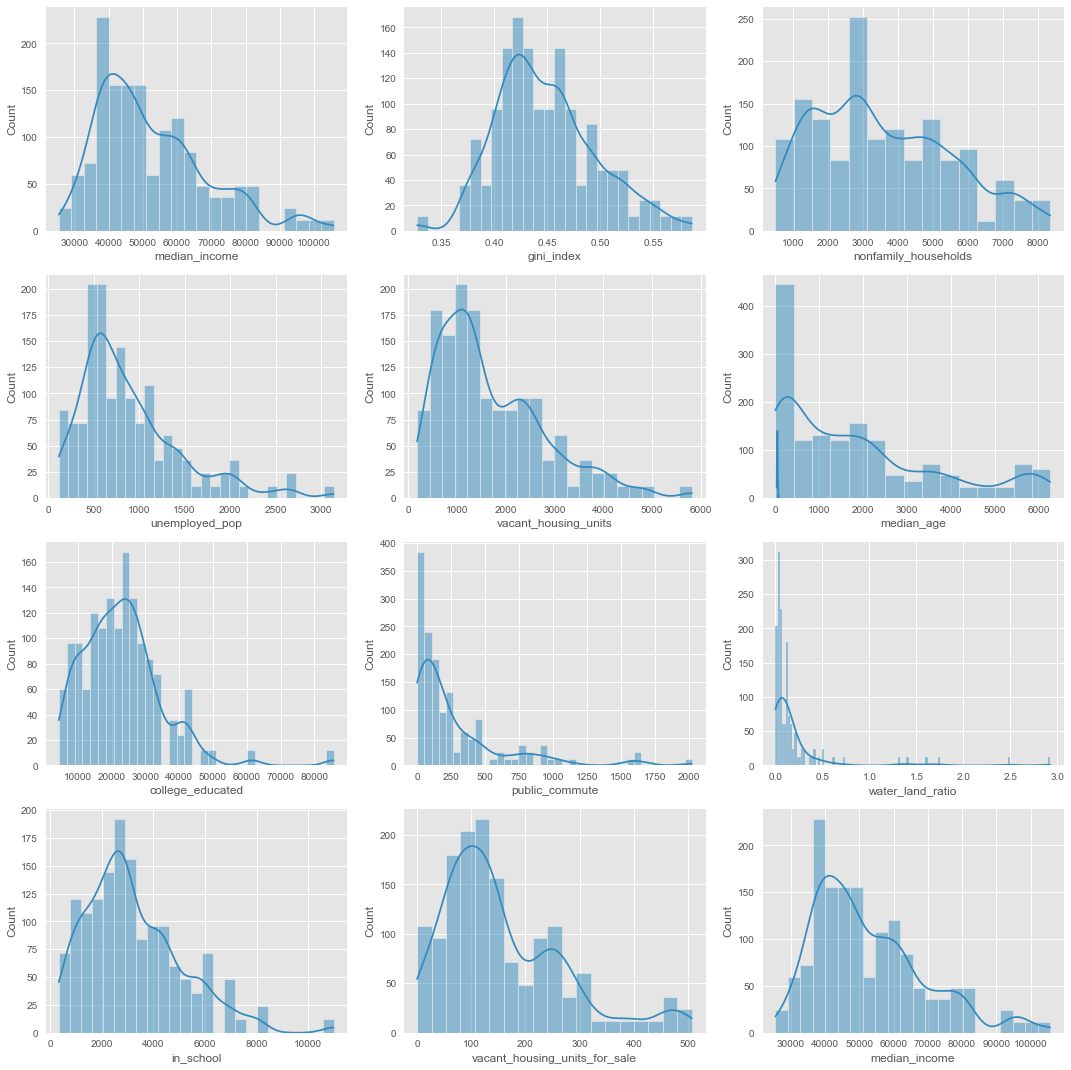

In [327]:
#see a few features
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.histplot( x= "median_income", data=features,  ax=axes[0,0], kde = True)
sns.histplot( x= "gini_index", data=features,  ax=axes[0,1], kde = True)
sns.histplot( x= "nonfamily_households", data=features, ax=axes[0,2], kde = True)
sns.histplot( x= "unemployed_pop", data=features,  ax=axes[1,0], kde = True)
sns.histplot( x= "vacant_housing_units", data=features,  ax=axes[1,1], kde = True)
sns.histplot( x= "median_age", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "large_dwellings", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "college_educated", data=features,  ax=axes[2,0], kde = True)
sns.histplot( x= "public_commute", data=features,  ax=axes[2,1], kde = True)
sns.histplot( x= "water_land_ratio", data=features,  ax=axes[2,2], kde = True)
sns.histplot( x= "in_school", data=features,  ax=axes[3,0], kde = True)
sns.histplot( x= "vacant_housing_units_for_sale", data=features,  ax=axes[3,1], kde = True)
sns.histplot( x= "median_income", data=features,  ax=axes[3,2], kde = True)

plt.tight_layout();

### Label

In [448]:
label = df_model[(df_model['year'].isin(['2018']))][['zri']]
label.head()

,zri
11000,1409.0
11001,1293.0
11002,1263.0
11003,1048.0
11004,1433.0


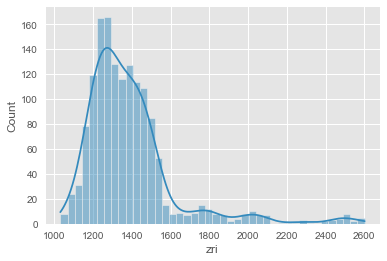

In [330]:
sns.histplot( x= "zri", data=label, kde = True);


In [449]:
label_trans = np.log(label)
label_trans.head()

,zri
11000,7.250636
11001,7.164720
11002,7.141245
11003,6.954639
11004,7.267525


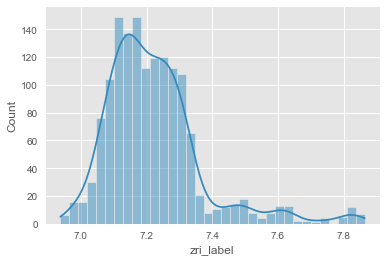

In [332]:
label_trans.rename(columns = {'zri':'zri_label'}, inplace = True)
sns.histplot( x= "zri_label", data=label_trans, kde = True);

In [333]:
label_trans.shape[0]

1500

In [334]:
features.shape[0]

1500

In [450]:
#transform zri to log scale
features['zri'] = pd.to_numeric(features['zri'], errors='coerce')
features['zri'] = np.log(features['zri'])

In [451]:
features = features.reset_index(drop = True)

In [452]:
label_trans = label_trans.reset_index(drop = True)

In [453]:
lab_and_features = pd.concat([label_trans,features], axis = 1)

In [454]:
lab_and_features.head(5)

,zri,RegionName,zri,year,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,water_land_ratio
0,7.250636,33647,7.198184,2016,0.4592,39069.0,34.3,76755.0,12387.0,15828.0,7224.0,2123.0,32713.0,13264.0,186800.0,261000.0,361600.0,2234.0,659.0,407.0,254.0,57560.0,85690.0,10978.0,3770.0,10603.0,9140.0,22.0,8093.0,10225.0,9131.0,7318.0,6603.0,14702.0,12605.0,2451.0,19536.0,5750.0,342.0,6910.0,2115.0,421.0,9390.0,18237.0,2473.0,8229.0,19687.0,4264.0,0.044168
1,7.164720,33511,7.119636,2016,0.4016,27653.0,35.8,56077.0,8924.0,13705.0,7248.0,1430.0,28233.0,10425.0,124500.0,163100.0,213400.0,2206.0,921.0,282.0,430.0,50264.0,61505.0,8026.0,5536.0,17425.0,2370.0,198.0,9093.0,12370.0,11276.0,7215.0,2462.0,14776.0,9649.0,1855.0,16551.0,6266.0,170.0,7808.0,2225.0,325.0,7406.0,14846.0,2701.0,6026.0,16838.0,5452.0,0.054533
2,7.141245,33578,7.096721,2016,0.4081,27870.0,33.0,58334.0,7698.0,11374.0,6067.0,1724.0,24350.0,9010.0,107600.0,154600.0,209500.0,1299.0,468.0,91.0,230.0,44598.0,49262.0,7542.0,3790.0,14727.0,1382.0,80.0,9462.0,12746.0,8967.0,6448.0,2026.0,13854.0,7800.0,1485.0,13515.0,3984.0,127.0,6416.0,1470.0,418.0,6227.0,13511.0,1683.0,6190.0,14778.0,3133.0,0.114368
3,6.954639,34668,6.930495,2016,0.4097,18412.0,46.2,33697.0,7280.0,10721.0,7452.0,1915.0,16181.0,11743.0,50200.0,67800.0,92100.0,4316.0,623.0,493.0,220.0,28776.0,32403.0,5293.0,5130.0,22964.0,685.0,46.0,1366.0,5738.0,14232.0,3517.0,424.0,9094.0,3786.0,2322.0,18631.0,1965.0,98.0,4092.0,1680.0,560.0,4588.0,10365.0,4750.0,4701.0,11192.0,7611.0,0.167757
4,7.267525,34698,7.201916,2016,0.4639,30273.0,53.1,45254.0,7267.0,9436.0,8175.0,1157.0,16699.0,11454.0,83000.0,153500.0,238900.0,3720.0,240.0,319.0,360.0,29170.0,41555.0,3928.0,4130.0,16968.0,831.0,258.0,1312.0,2595.0,11164.0,4694.0,1753.0,9599.0,4774.0,1042.0,14842.0,3967.0,148.0,4290.0,1343.0,376.0,3385.0,7843.0,5194.0,3092.0,8928.0,8050.0,0.503604


Drop all the rows that don't have a value for the 2017 zri label

In [340]:
missing_labels = lab_and_features[(lab_and_features['zri_label'].isna())].index
lab_and_features = lab_and_features.drop(index = missing_labels)
lab_and_features.shape[0]

1482

In [341]:
print_missingness(lab_and_features)

The number of observations is 1482
The number of variables is 48
    
The total number of missing values is 13
The number of rows with missing values is 13
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    13
dtype: int64


## Benchmark model
### Predicting zri with historical zri values

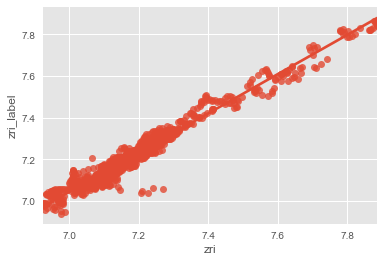

In [342]:

sns.regplot( x= "zri", y = 'zri_label', data=lab_and_features);

#### Train test split

In [343]:
from sklearn.model_selection import train_test_split

Xbase = lab_and_features[['zri']]
y = lab_and_features['zri_label']
#benchmark model

XtrainB, XtestB, ytrainB, ytestB = train_test_split(Xbase,y)

### Imputation

In [344]:
XtrainB = XtrainB.fillna(method = 'ffill')
XtestB = XtestB.fillna(method = 'ffill')

No need to do scaling since the data are on the same scale and similar distributions

### OLS

In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

base_ols = LinearRegression()
base_ols.fit(XtrainB,ytrainB)

print(f'Linear regression training score: {base_ols.score(XtrainB,ytrainB)}')
print(f'Linear regression testing score: {base_ols.score(XtestB,ytestB)}')

y_pred = base_ols.predict(XtestB)
RMSE = mean_squared_error(ytestB,y_pred,squared = False)
print(f'Linear regression RMSE: {RMSE}')

Linear regression training score: 0.9327889612169209
Linear regression testing score: 0.9448942441650062
Linear regression RMSE: 0.034337731412457856


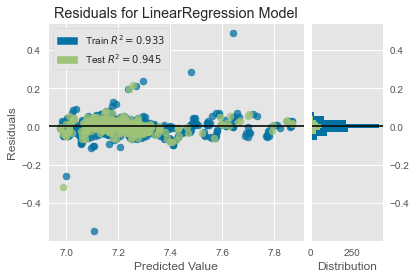

In [346]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(base_ols)
visualizer.fit(XtrainB, ytrainB) 
visualizer.score(XtestB, ytestB)  
visualizer.show() ;

In [352]:
#The final model to get the residuals will be trained in the whole data

Xbase_final = Xbase.fillna(method = 'ffill')

final_base_ols = LinearRegression()
final_base_ols.fit(Xbase_final, y)


LinearRegression()

In [353]:
predictions = final_base_ols.predict(Xbase_final) #gives an array
predictions

array([7.23125109, 7.15744299, 7.13591145, ..., 7.14056707, 7.28652088,
       7.19689576])

In [354]:
residuals = y - predictions
residuals[:5]

0    0.019384
1    0.007277
2    0.005334
3   -0.025077
4    0.032767
Name: zri_label, dtype: float64

Add residuals to the label and features dataframe

In [455]:
lab_and_features['residuals'] = residuals
lab_and_features.head(3)

,zri,RegionName,zri,year,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,water_land_ratio,residuals
0,7.250636,33647,7.198184,2016,0.4592,39069.0,34.3,76755.0,12387.0,15828.0,7224.0,2123.0,32713.0,13264.0,186800.0,261000.0,361600.0,2234.0,659.0,407.0,254.0,57560.0,85690.0,10978.0,3770.0,10603.0,9140.0,22.0,8093.0,10225.0,9131.0,7318.0,6603.0,14702.0,12605.0,2451.0,19536.0,5750.0,342.0,6910.0,2115.0,421.0,9390.0,18237.0,2473.0,8229.0,19687.0,4264.0,0.044168,0.019384
1,7.164720,33511,7.119636,2016,0.4016,27653.0,35.8,56077.0,8924.0,13705.0,7248.0,1430.0,28233.0,10425.0,124500.0,163100.0,213400.0,2206.0,921.0,282.0,430.0,50264.0,61505.0,8026.0,5536.0,17425.0,2370.0,198.0,9093.0,12370.0,11276.0,7215.0,2462.0,14776.0,9649.0,1855.0,16551.0,6266.0,170.0,7808.0,2225.0,325.0,7406.0,14846.0,2701.0,6026.0,16838.0,5452.0,0.054533,0.007277
2,7.141245,33578,7.096721,2016,0.4081,27870.0,33.0,58334.0,7698.0,11374.0,6067.0,1724.0,24350.0,9010.0,107600.0,154600.0,209500.0,1299.0,468.0,91.0,230.0,44598.0,49262.0,7542.0,3790.0,14727.0,1382.0,80.0,9462.0,12746.0,8967.0,6448.0,2026.0,13854.0,7800.0,1485.0,13515.0,3984.0,127.0,6416.0,1470.0,418.0,6227.0,13511.0,1683.0,6190.0,14778.0,3133.0,0.114368,0.005334


In [456]:
#lab_and_features.to_csv('./data/Tampa_df_predict_2018_w2016.csv')

#### Residuals EDA

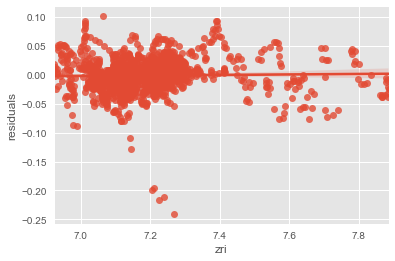

In [356]:
sns.regplot( x= "zri", y = 'residuals', data=lab_and_features);

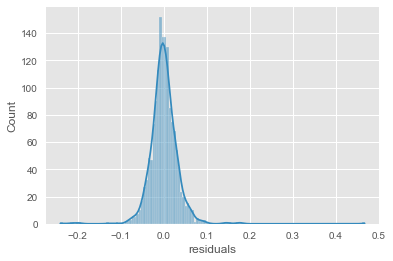

In [357]:
sns.histplot( x= "residuals", data=lab_and_features, kde = True);

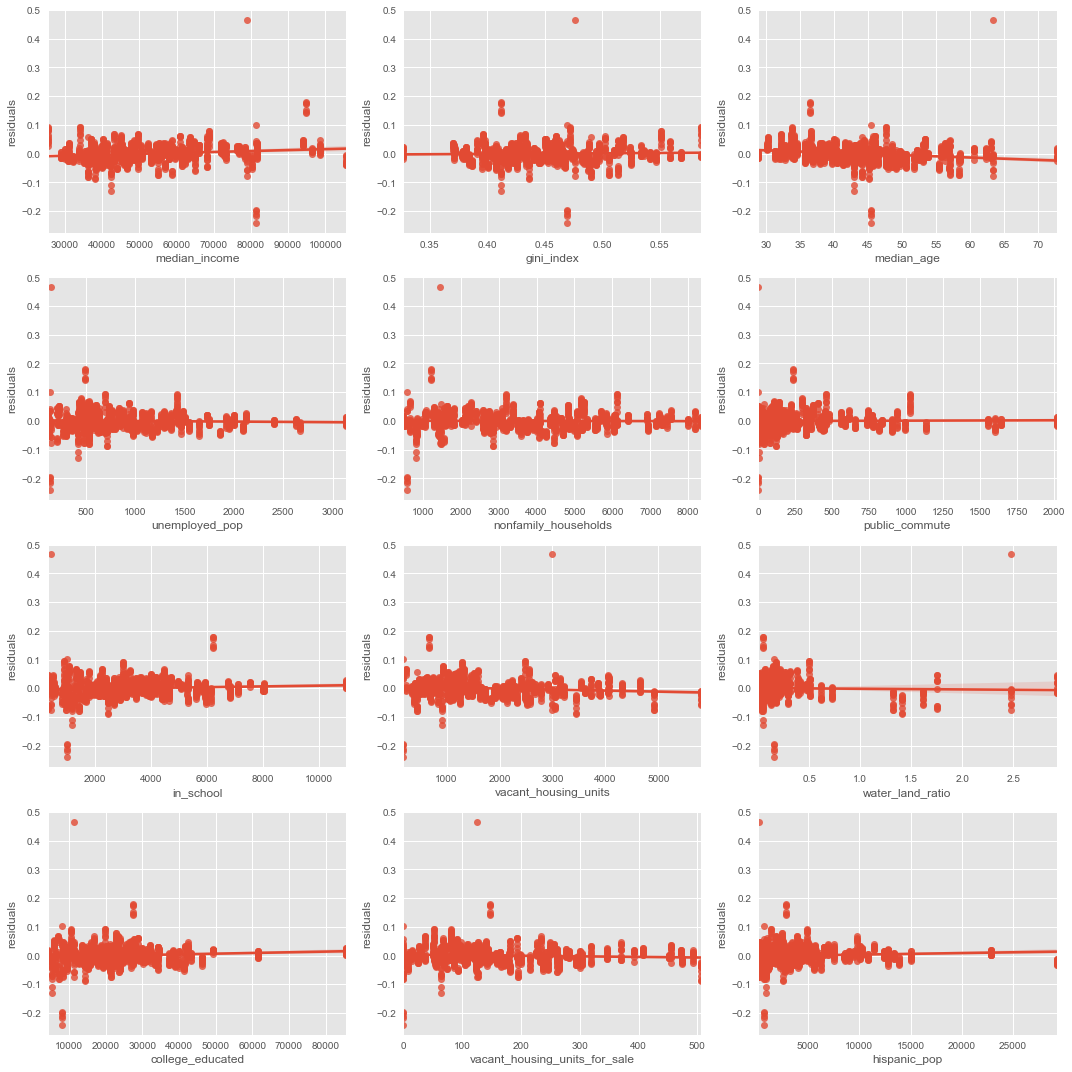

In [361]:
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.regplot( x= "median_income", y = 'residuals', data=lab_and_features,  ax=axes[0,0])
sns.regplot( x= "gini_index",y = 'residuals', data=lab_and_features,  ax=axes[0,1])
sns.regplot( x= "median_age", y = 'residuals', data=lab_and_features,  ax=axes[0,2])
sns.regplot( x= "unemployed_pop", y = 'residuals', data=lab_and_features,  ax=axes[1,0])
sns.regplot( x= "nonfamily_households", y = 'residuals',data=lab_and_features,  ax=axes[1,1])
sns.regplot( x= "public_commute", y = 'residuals',data=lab_and_features,  ax=axes[1,2])
sns.regplot( x= "in_school", y = 'residuals',data=lab_and_features,  ax=axes[2,0])
sns.regplot( x= "vacant_housing_units", y = 'residuals',data=lab_and_features,  ax=axes[2,1])
sns.regplot( x= "water_land_ratio", y = 'residuals',data=lab_and_features,  ax=axes[2,2])
sns.regplot( x= "college_educated", y = 'residuals',data=lab_and_features,  ax=axes[3,0])
sns.regplot( x= "vacant_housing_units_for_sale", y = 'residuals',data=lab_and_features,  ax=axes[3,1])
sns.regplot( x= "hispanic_pop", y = 'residuals',data=lab_and_features,  ax=axes[3,2])

plt.tight_layout();

### Modeling the residuals

In [362]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  GridSearchCV, KFold

In [363]:
print_missingness(lab_and_features)

The number of observations is 1482
The number of variables is 49
    
The total number of missing values is 13
The number of rows with missing values is 13
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    13
dtype: int64


In [364]:
lab_and_features.dropna(inplace = True)

In [409]:
Xrfr = lab_and_features.drop(columns =  ['residuals','zri',
                                        'zri_label', 'year',
                                        'RegionName'])
Yrfr = lab_and_features['residuals'] 
print(Xrfr.shape)
print(len(Yrfr))

(1469, 45)
1469


In [410]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xrfr,Yrfr)

In [411]:
Xtrain.sample(5)

,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60,water_land_ratio
1268,0.4335,20024.0,45.4,36068.0,5852.0,8188.0,5857.0,1464.0,11988.0,8867.0,45800.0,78400.0,132100.0,2784.0,575.0,243.0,168.0,21014.0,26871.0,4646.0,3802.0,17253.0,591.0,90.0,958.0,3997.0,10548.0,3010.0,487.0,6280.0,3102.0,1767.0,11950.0,2180.0,97.0,3387.0,1454.0,240.0,4087.0,7438.0,3490.0,3467.0,8524.0,6471.0,0.006885
1044,0.4197,23665.0,60.6,39953.0,4784.0,5675.0,2926.0,752.0,5590.0,6989.0,33100.0,68200.0,129800.0,3868.0,218.0,392.0,8.0,9712.0,13814.0,1475.0,2254.0,12343.0,412.0,37.0,637.0,1590.0,6284.0,1854.0,463.0,3016.0,1560.0,594.0,3679.0,268.0,15.0,1075.0,421.0,101.0,1342.0,3501.0,4163.0,1174.0,3487.0,4926.0,0.004742
655,0.4971,25109.0,42.3,41289.0,3416.0,5643.0,5055.0,1291.0,11472.0,5628.0,88700.0,147000.0,243500.0,3137.0,722.0,136.0,938.0,19576.0,26458.0,3813.0,2520.0,10397.0,207.0,83.0,15396.0,1519.0,7181.0,2488.0,1029.0,7352.0,2923.0,607.0,10814.0,2531.0,177.0,2855.0,1486.0,552.0,3227.0,7123.0,2210.0,2556.0,7437.0,3696.0,0.392865
729,0.4274,27670.0,33.8,56313.0,2850.0,3849.0,2755.0,837.0,8934.0,3844.0,110300.0,162700.0,229300.0,737.0,197.0,90.0,102.0,16562.0,22080.0,2384.0,1684.0,3656.0,630.0,74.0,2737.0,3122.0,3542.0,2145.0,917.0,4659.0,3228.0,618.0,5473.0,1588.0,151.0,1769.0,664.0,176.0,2272.0,4612.0,703.0,1905.0,5943.0,1632.0,0.022765
779,0.4150,21683.0,48.6,37416.0,4290.0,6263.0,5191.0,633.0,11229.0,8027.0,47600.0,88200.0,140600.0,3054.0,145.0,128.0,438.0,19868.0,19987.0,3117.0,3050.0,14871.0,2031.0,118.0,1635.0,2760.0,8297.0,2722.0,435.0,6973.0,3153.0,576.0,7612.0,3777.0,96.0,2259.0,943.0,129.0,2686.0,6523.0,2962.0,2409.0,6325.0,5060.0,0.091896


In [412]:
rfr = RandomForestRegressor()
rfr.fit(Xtrain, ytrain)
print(f'RF regression training score: {rfr.score(Xtrain, ytrain)}')
print(f'RF regression testing score: {rfr.score(Xtest, ytest)}')

RF regression training score: 0.7049408427889133
RF regression testing score: 0.5973556348234936


In [413]:
#parameters grid
params = {'ccp_alpha':[0,0.0001], #lets decrease the size of each tree
         'n_estimators': [200, 300, 400],
         'min_samples_leaf':[5, 10, 20],
         'max_features':[0.3, 0.4]}
cv = KFold(n_splits = 5, shuffle= True)

grid = GridSearchCV(estimator = rfr,
                   param_grid = params,
                   cv = cv,
                   return_train_score = True)

grid.fit(Xtrain, np.ravel(ytrain))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0, 0.0001], 'max_features': [0.3, 0.4],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [200, 300, 400]},
             return_train_score=True)

In [414]:
grid.best_params_

{'ccp_alpha': 0,
 'max_features': 0.4,
 'min_samples_leaf': 5,
 'n_estimators': 400}

In [415]:
best_rf = grid.best_estimator_
print(f'RF best regression training score: {best_rf.score(Xtrain, ytrain)}')
print(f'RF best regression testing score: {best_rf.score(Xtest, ytest)}')

RF best regression training score: 0.6900098548898372
RF best regression testing score: 0.586955715049897


In [416]:
feat_imp = pd.Series(rfr.feature_importances_, index = Xtrain.columns)
feat_imp = feat_imp.sort_values(ascending = False)
feat_imp

median_age                                           0.116647
vacant_housing_units                                 0.110770
income_per_capita                                    0.082475
female_over_60                                       0.073805
black_pop                                            0.051475
water_land_ratio                                     0.037026
income_less_than_125000                              0.036461
rent_uncomputed                                      0.034749
median_income                                        0.025464
vacant_housing_units_for_rent                        0.022114
gini_index                                           0.020420
high_school_educated                                 0.018543
vacant_housing_units_for_sale                        0.017942
unemployed_pop                                       0.017634
owner_occupied_housing_units_median_value            0.016894
income_over_125000                                   0.016625
amerindi

In [417]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(Xtrain, np.ravel(ytrain))

GradientBoostingRegressor()

In [418]:
print(gbr.score(Xtrain,ytrain))
print(gbr.score(Xtest,ytest))

y_pred = gbr.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'Gradient Boosting RMSE: {RMSE}')

0.6977637597617691
0.592363620588975
Gradient Boosting RMSE: 0.016981430430714563


In [419]:
paramsGB = {'learning_rate':[.01,1,10], #lets decrease the size of each tree
            'n_estimators': [50, 100, 200],
            'max_depth':[3, 4]}

In [420]:
gridGB = GridSearchCV(estimator = gbr,
                       param_grid = paramsGB,
                       cv = cv,
                       return_train_score = True)

gridGB.fit(Xtrain,ytrain)

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packa

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packa

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/nump

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packa

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 1, 10], 'max_depth': [3, 4],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [421]:
gridGB.best_params_

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}

In [422]:
best_gb = gridGB.best_estimator_
print(f'GB best regression training score: {best_gb.score(Xtrain, ytrain)}')
print(f'GB best regression testing score: {best_gb.score(Xtest, ytest)}')

GB best regression training score: 0.7053823257724234
GB best regression testing score: 0.5963351688457349


The best gradient boosting model from the grid search is worse than the default one. It is definetly overfit. Keep the params

In [441]:
feat_impGB = pd.Series(gbr.feature_importances_, index = Xtrain.columns)
feat_impGB.sort_values(ascending = False).head(10)

income_per_capita                0.088074
income_less_than_125000          0.087453
vacant_housing_units             0.078416
median_age                       0.075829
black_pop                        0.065490
female_over_60                   0.063017
water_land_ratio                 0.062370
vacant_housing_units_for_sale    0.037824
rent_tento50                     0.032050
male_over_60                     0.030802
dtype: float64